In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

print('If this cell runs successfully, it produces no output other than this message.')

If this cell runs successfully, it produces no output other than this message.


In [2]:
#Is the percent alcohols of our chosen liquors (grenadine, amaretto, baileys, southern comfort, absinthe, everclear)
percentAlcohol = [0, 0.28, 0.17, 0.5, 0.76, 0.95]
index = [0,1,2,3,4,5]

alcoholCp = []

[]

In [3]:
#Computes the Cp's for our 6 alcohols. 3.89 is a Cp we chose for the 'other' ingredients in alcohol from a study on Cp's of juices.
#2.44 is the Cp of ethanol and is multiplied by the percent of ethanol in each alcohol. 
for i, j in zip(index, percentAlcohol):
    alcoholCp.append(((((1-j)/1)*3.89) + ((j/1)*2.44))) 

In [4]:
alcoholCp

[3.89, 3.484, 3.6435, 3.165, 2.7880000000000003, 2.5125]

In [5]:
#Densities for our 6 alcohols 
densities = [1.18, 1.1, 1.057, 0.97, 0.89, 0.80]

[1.18, 1.1, 1.057, 0.97, 0.89, 0.8]

In [6]:
#Multiplies the Cp's by the densities for our alcohols
cp_Times_Densities = [a*b for a,b in zip(alcoholCp,densities)]

[4.5902,
 3.8324000000000003,
 3.8511794999999998,
 3.07005,
 2.48132,
 2.0100000000000002]

In [7]:
cp_Times_Densities

[4.5902,
 3.8324000000000003,
 3.8511794999999998,
 3.07005,
 2.48132,
 2.0100000000000002]

In [8]:
#All of the volumes we are going to sweep (0.5 to 6 oz, except in milliliters)
volumes = [14.785, 29.57, 44.355, 59.14, 73.925, 88.71, 103.495, 118.28, 133.065, 147.85, 162.635, 177.42]

[14.785,
 29.57,
 44.355,
 59.14,
 73.925,
 88.71,
 103.495,
 118.28,
 133.065,
 147.85,
 162.635,
 177.42]

In [9]:
def make_system(T_init=90, r=0.01, volume=300, t_end=30, C=0):
    init = State(T=T_init)
    return System(init=init, T_final=T_init, volume=volume, r=r, T_env=22,
                  t_0=0, t_end=t_end, dt=1, C=C)

In [10]:
def update_func(state, t, system):

    unpack(system)
    
    T = state.T
    T += -r * (T - T_env) * dt
    
    return State(T=T)

In [11]:
def run_simulation(system, update_func):

    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[0] = init
    ts = linrange(0, t_end, dt)
    
    for t in ts:
        frame.row[t+dt] = update_func(frame.row[t], t, system)
        
    # store the final temperature in T_final
    system.T_final = get_last_value(frame.T)
    
    return frame

In [12]:
def mix(s1, s2):
    assert s1.t_end == s2.t_end
    
    C_mix = s1.C + s2.C
    
    T_mix = (s1.C * s1.T_final + 
             s2.C * s2.T_final) / C_mix
    
    V_mix = s1.volume + s2.volume
    
    
    mixture = make_system(T_init=T_mix, t_end=0, r=s1.r, volume=V_mix)
    
    return mixture

In [13]:
#Returns the final temp of the mixture
def run_and_mix(t_add, t_total, coffee, alc):

    coffee.t_end = t_add
    coffee_results = run_simulation(coffee, update_func)  #Returns frame of cooling coffee up to t_add minutes

    alc.t_end = t_add
    alc_results = run_simulation(alc, update_func)      #Returns frame of cooling milk up to t_add minutes

    
    mixture = mix(coffee, alc)     #Calculates temp and volume of new mixture after mixing them
    mixture.t_end = t_total - t_add #Subtracts time already in car from total car ride(30 minutes), and passes it into t_end
    results = run_simulation(mixture, update_func)  
    #Runs simulation of new mixture until end of car ride, and returns a 3rd frame with
    #temps of mixture from when they were added together until end of car ride

    
    return mixture.T_final

In [14]:
def error_func1(r):
    system = make_system(T_init=90, r=r, volume=300, t_end=30)
    results = run_simulation(system, update_func)
    return system.T_final - 70

In [15]:
solution = fsolve(error_func1, 0.01)
r_coffee = solution[0]
r_coffee

0.011543084583973956

In [16]:
def error_func2(r):
    system = make_system(T_init=5, r=r, volume=50, t_end=15)
    results = run_simulation(system, update_func)
    return system.T_final - 20

In [17]:
solution = fsolve(error_func2, 0.01)
r_milk = solution[0]
r_milk

0.13296078935466452

In [18]:
#Calculate r for paper cup 

def error_func3(r):
    system = make_system(T_init=81.6, r=r, volume=90, t_end=23)
    results = run_simulation(system, update_func)
    return system.T_final - 38.9

In [19]:
solution = fsolve(error_func3, 0.01)
r_paper = solution[0]
r_paper

0.053323146847086465

In [20]:
#Calculate r for styrofoam cup 

def error_func4(r):
    system = make_system(T_init=80.5, r=r, volume=90, t_end=23)
    results = run_simulation(system, update_func)
    return system.T_final - 46.6

In [21]:
solution = fsolve(error_func4, 0.01)
r_styrofoam = solution[0]
r_styrofoam

0.03696388121483462

In [22]:
#Calculate r for ceramic cup 

def error_func5(r):
    system = make_system(T_init=78.6, r=r, volume=90, t_end=23)
    results = run_simulation(system, update_func)
    return system.T_final - 41.7

In [23]:
solution = fsolve(error_func5, 0.01)
r_ceramic = solution[0]
r_ceramic

0.04484966967162434

In [24]:
def bigObject(sweepArray, CpDcount):
    
    if(CpDcount == 1):
        bigObject.sweep1 = sweepArray
        return
    if(CpDcount == 2):
        bigObject.sweep2 = sweepArray
        return
    if(CpDcount == 3):
        bigObject.sweep3 = sweepArray
        return
    if(CpDcount == 4):
        bigObject.sweep4 = sweepArray
        return
    if(CpDcount == 5):
        bigObject.sweep5 = sweepArray
        return
    if(CpDcount == 6):
        bigObject.sweep6 = sweepArray
        return
        
        
        

In [25]:
def sweep(coffee, alc, count, sweepArray, CpDcount):
    sweep = SweepSeries()
    
    for t_add in linspace(0, 30, 11):
        sweep[t_add] = run_and_mix(t_add, 30, coffee, alc)
       
    sweepArray.append(sweep)
    
    if(count == 12):
        bigObject(sweepArray, CpDcount)
    else:
        return

In [26]:
def main1():
    CpDcount = 0
    for CpD in cp_Times_Densities:
        CpDcount+=1
        count = 0
        sweepArray = []
        for vol in volumes:
            count+=1
            
            C1 = 1 * 236.56 * 4.2
            C2 = CpD * vol
            
            coffee = make_system(T_init=90, r=r_coffee, volume=236.56, t_end=30, C = C1)
            alc = make_system(T_init=5, r=r_milk, volume=vol, t_end=30, C = C2)
            
            sweep(coffee, alc, count, sweepArray, CpDcount)
        
    
    

In [27]:
#May take 1-2 minutes to run
main1()

(40, 70)

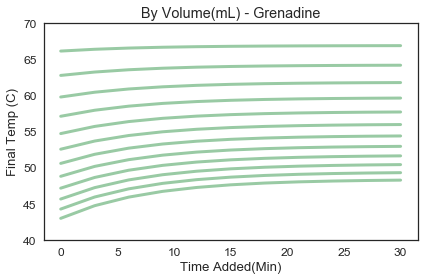

In [28]:
for i in range(12):
    plot(bigObject.sweep1[i], color='C1')
decorate(title = 'By Volume(mL) - Grenadine', xlabel='Time Added(Min)', ylabel='Final Temp (C)')
plt.ylim((40,70))

(40, 70)

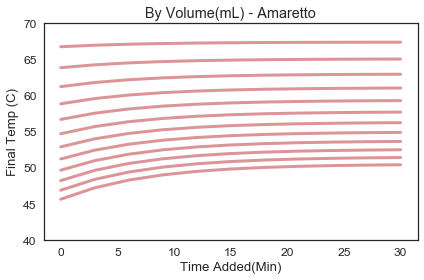

In [29]:
for i in range(12):
    plot(bigObject.sweep2[i], color='C2')
decorate(title = 'By Volume(mL) - Amaretto', xlabel='Time Added(Min)', ylabel='Final Temp (C)')
plt.ylim((40,70))

(40, 70)

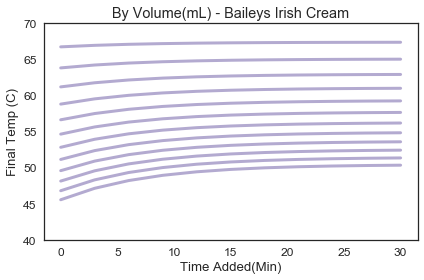

In [30]:
for i in range(12):
    plot(bigObject.sweep3[i], color='C3')
decorate(title = 'By Volume(mL) - Baileys Irish Cream', xlabel='Time Added(Min)', ylabel='Final Temp (C)')
plt.ylim((40,70))

(40, 70)

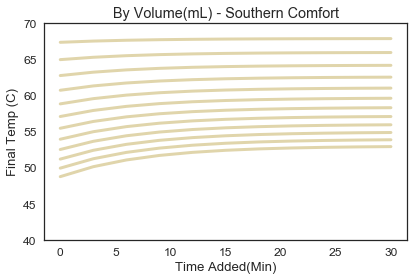

In [31]:
for i in range(12):
    plot(bigObject.sweep4[i], color='C4')
decorate(title = 'By Volume(mL) - Southern Comfort', xlabel='Time Added(Min)', ylabel='Final Temp (C)')
plt.ylim((40,70))

(40, 70)

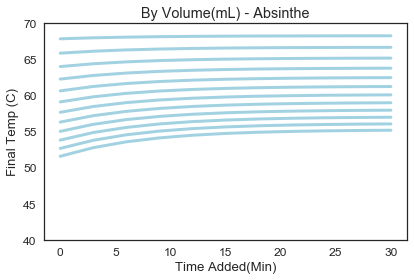

In [32]:
for i in range(12):
    plot(bigObject.sweep5[i], color='C5')
decorate(title = 'By Volume(mL) - Absinthe', xlabel='Time Added(Min)', ylabel='Final Temp (C)')
plt.ylim((40,70))

(40, 70)

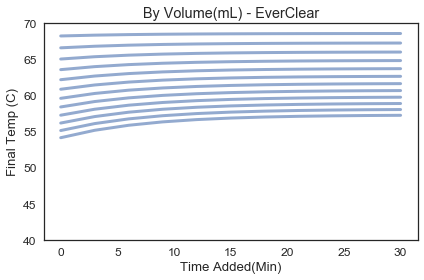

In [33]:
for i in range(12):
    plot(bigObject.sweep6[i], color='C6')
decorate(title = 'By Volume(mL) - EverClear', xlabel='Time Added(Min)', ylabel='Final Temp (C)')
plt.ylim((40,70))

(40, 70)

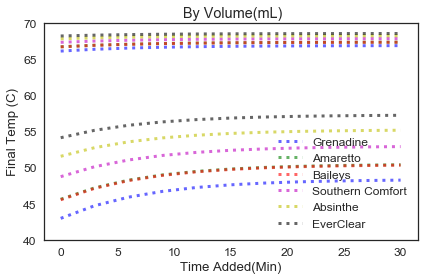

In [34]:
plot(bigObject.sweep1[0], ':', color='b', label = 'Grenadine')
plot(bigObject.sweep1[11], ':', color='b')

plot(bigObject.sweep2[0], ':', color='g', label = 'Amaretto')
plot(bigObject.sweep2[11], ':', color='g')

plot(bigObject.sweep3[0], ':', color='r', label = 'Baileys')
plot(bigObject.sweep3[11], ':', color='r')

plot(bigObject.sweep4[0], ':', color='m', label = 'Southern Comfort')
plot(bigObject.sweep4[11], ':', color='m')

plot(bigObject.sweep5[0], ':', color='y', label = 'Absinthe')
plot(bigObject.sweep5[11], ':', color='y')

plot(bigObject.sweep6[0], ':', color='k', label = 'EverClear')
plot(bigObject.sweep6[11], ':', color='k')

decorate(title = ' By Volume(mL)', xlabel='Time Added(Min)', ylabel='Final Temp (C)')
plt.ylim((40,70))

In [35]:
def sweep2(coffee, alc, sweepArray, count):
    sweep = SweepSeries()
    
    for t_add in linspace(0, 30, 11):
        sweep[t_add] = run_and_mix(t_add, 30, coffee, alc)
       
    sweepArray.append(sweep)
    
    if(count == 3):
        sweep2.cups = sweepArray

In [36]:
#Running a simulation with only grenadine at 6oz to demonstrate difference between styrofoam, ceramic, and paper

r = [r_paper, r_styrofoam, r_ceramic]

def main2():
    sweepArray = []
    count = 0
    for i in r:
        count+=1
        
        C1 = 1 * 236.56 * 4.2
        C2 = 4.5902 * 177.42
        
        coffee = make_system(T_init=90, r = i, volume=236.56, t_end=30, C = C1)
        alc = make_system(T_init=5, r=r_milk, volume=177.42, t_end=30, C = C2)
        
        sweep2(coffee, alc, sweepArray, count)

In [37]:
main2()

(25, 35)

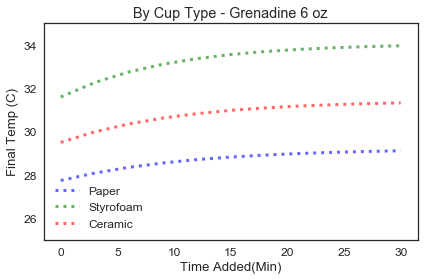

In [38]:
plot(sweep2.cups[0], ':', color='b', label = 'Paper')
plot(sweep2.cups[1], ':', color='g', label = 'Styrofoam')
plot(sweep2.cups[2], ':', color='r', label = 'Ceramic')
decorate(title = 'By Cup Type - Grenadine 6 oz', xlabel='Time Added(Min)', ylabel='Final Temp (C)')
plt.ylim((25,35))